Week 8 Assignment

Name: Anisul Arman

Course_ID: IS 362 Data Acquisition and Management . 

In [7]:
# i am isntalling my libaries
!pip install pandas
!pip install seaborn
!pip install requests
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from zipfile import ZipFile

In [9]:
# https://stackoverflow.com/questions/44575251/reading-multiple-files-contained-in-a-zip-file-with-pandas#:~:text=You%20can%20pass%20ZipFile.,into%20a%20multi%2Dfile%20zip%20.
# load data using the csv


# URL of the dataset
url = 'https://archive.ics.uci.edu/static/public/9/auto+mpg.zip'

# download the zIP file
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))

# extract the csv file from the zIpped archive
with zip_file.open('auto-mpg.data') as file:
    auto_df = pd.read_csv(file, delim_whitespace=True, header=None)

auto_df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
# reanme columns header uisng the variable names
variables_name = names=['mpg', 'cylinders', 'displacement', 'horsepower', 
                                 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

auto_df.columns = variables_name

auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [11]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [12]:
# decribe dataset
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
# replace '?' in horsepower with missing value (nan) and convert to numbers
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [14]:
# change origin numbers to names (1=usa, 2=asia, 3=europe)
# https://www.geeksforgeeks.org/python-pandas-map/
auto_df['origin'] = auto_df['origin'].map({1: 'usa', 2: 'asia', 3: 'europe'})
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


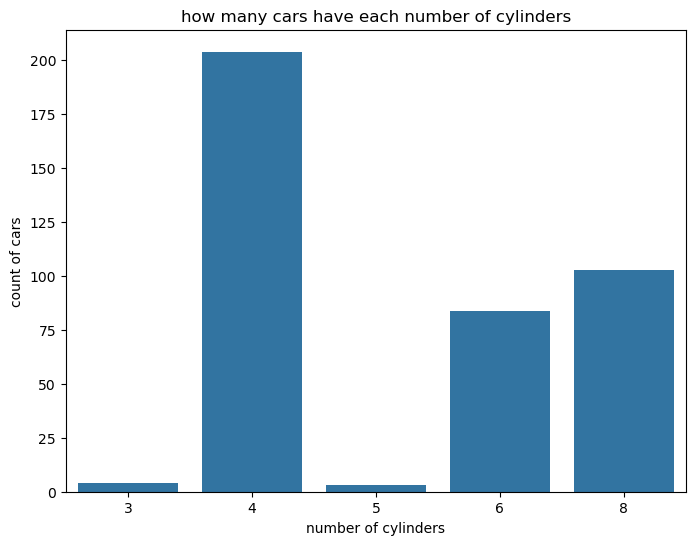

In [21]:
# bar chart to show how many cars have each number of cylinders
plt.figure(figsize=(8, 6))
sns.countplot(x='cylinders', data=auto_df)
plt.title('how many cars have each number of cylinders')
plt.xlabel('number of cylinders')
plt.ylabel('count of cars')
plt.show()

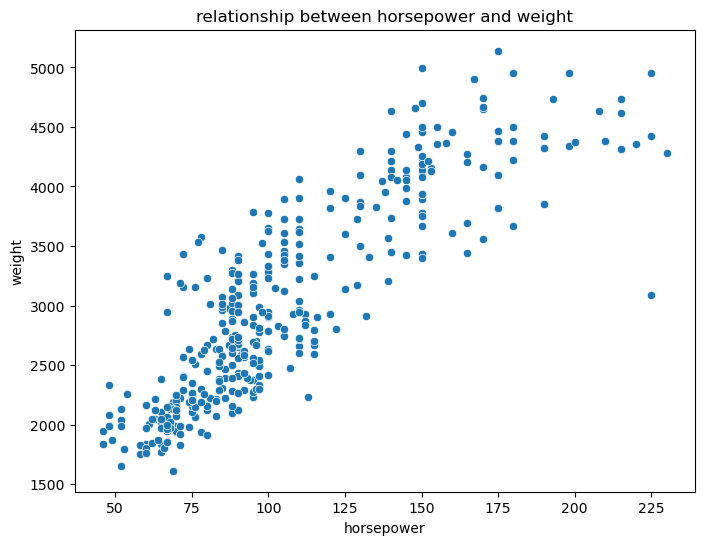

In [19]:
# scatterplot to show how horsepower and weight are related
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='weight', data=auto_df)
plt.title('relationship between horsepower and weight')
plt.xlabel('horsepower')
plt.ylabel('weight')
plt.show()

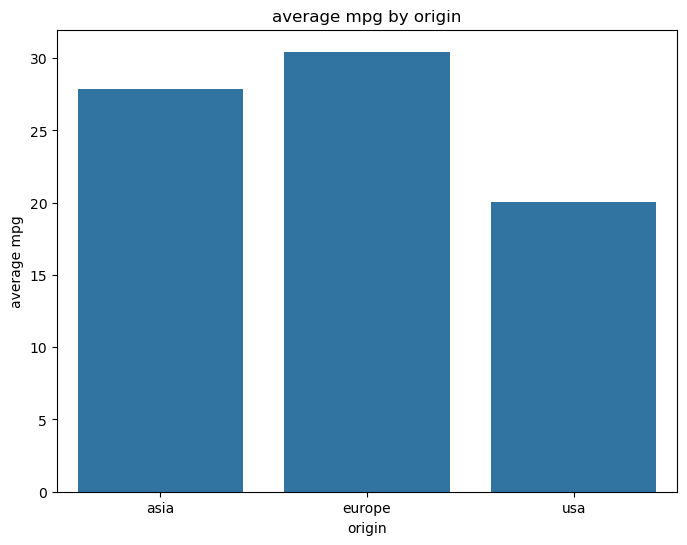

In [ ]:
# compare average mpg (miles per gallon) for cars from usa, asia, and europe
avg_mpg_by_origin = auto_df.groupby('origin')['mpg'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='origin', y='mpg', data=avg_mpg_by_origin)
plt.title('average mpg by origin')
plt.xlabel('origin')
plt.ylabel('average mpg')
plt.show()